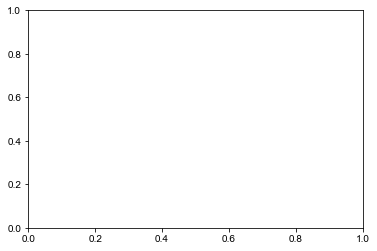

In [1]:
import matplotlib.pyplot as plt

import matplotlib.font_manager
from matplotlib.font_manager import FontProperties

from pathlib import Path

import matplotlib as mpl
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

fig, ax = plt.subplots()

fpath = Path(mpl.get_data_path(), "/n/holylabs/LABS/extavour_lab/Users/rkapoor/envs/plot/fonts/arial.ttf")
from matplotlib.font_manager import FontProperties
from matplotlib import font_manager
plt.rcParams['figure.dpi'] = 300
font_path = "/n/holylabs/LABS/extavour_lab/Users/rkapoor/envs/plot/fonts/arial.ttf"
font_manager.fontManager.addfont("/n/holylabs/LABS/extavour_lab/Users/rkapoor/envs/plot/fonts/arial.ttf")
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
import pandas as pd
from collections import Counter
import ast

In [58]:
hgtdf=pd.read_csv("hgt_interval_data.tsv",sep="\t",index_col=0)
df_cluster=pd.read_csv("corrected_cluster_info.tsv",sep="\t")
intervals=[]
for index, row in df_cluster.iterrows():
    intervals.extend(ast.literal_eval(row.HGT_intervals))

In [59]:
origins=hgtdf[(hgtdf.index.isin(intervals))]["Tree_inferred_donor_superkingdom(s)"]
origins2=[]
for o in origins:
    origins2.extend(o.split(","))
m=dict(Counter(origins2))
m=dict(sorted(m.items(), key=lambda item: item[1],reverse=True))

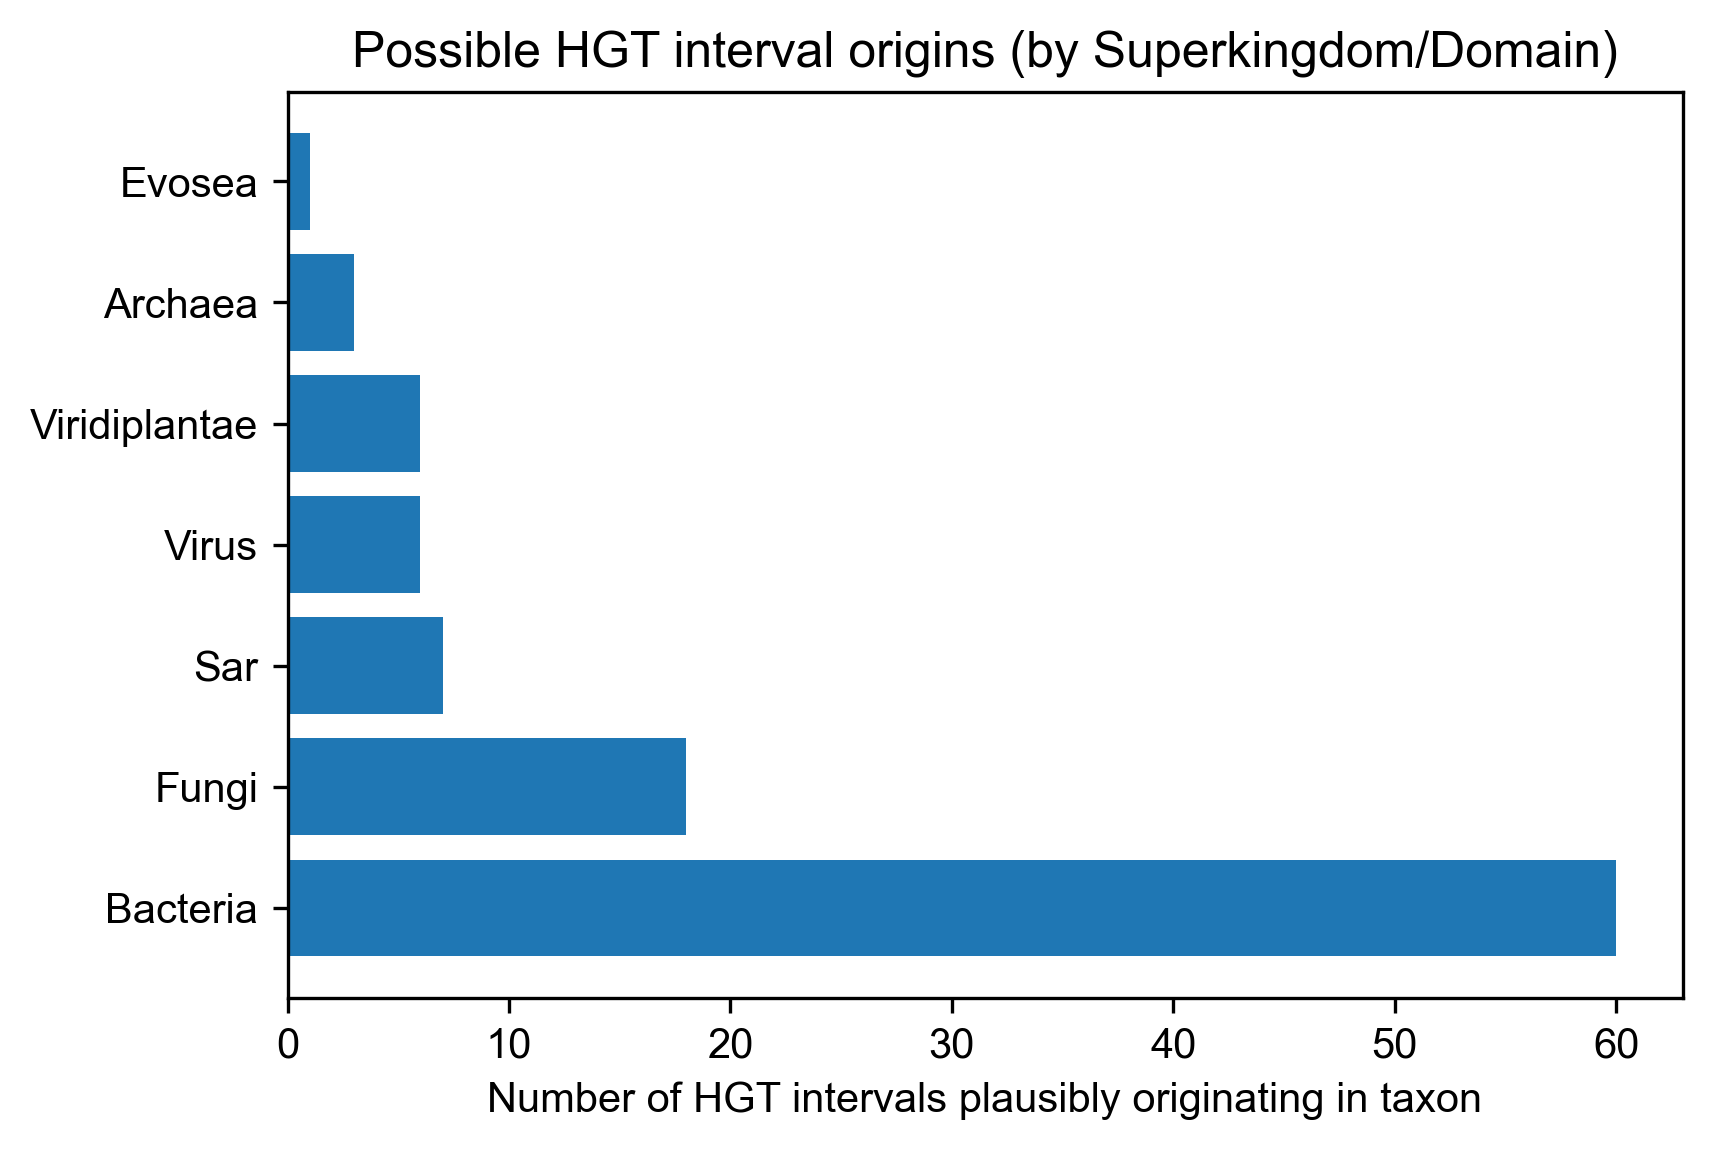

In [60]:
plt.figure(figsize=(6, 4))

plt.barh([x for x in m],[m[x] for x in m])
plt.xlabel("Number of HGT intervals plausibly originating in taxon")
plt.title("Possible HGT interval origins (by Superkingdom/Domain)")
plt.savefig("HGT_interval_superkingdom_origins.svg",format="svg",bbox_inches="tight")
plt.show()

In [61]:
dfsymb=pd.read_csv("bacteria_donor_genra.csv",index_col=0)

<Figure size 1800x1200 with 0 Axes>

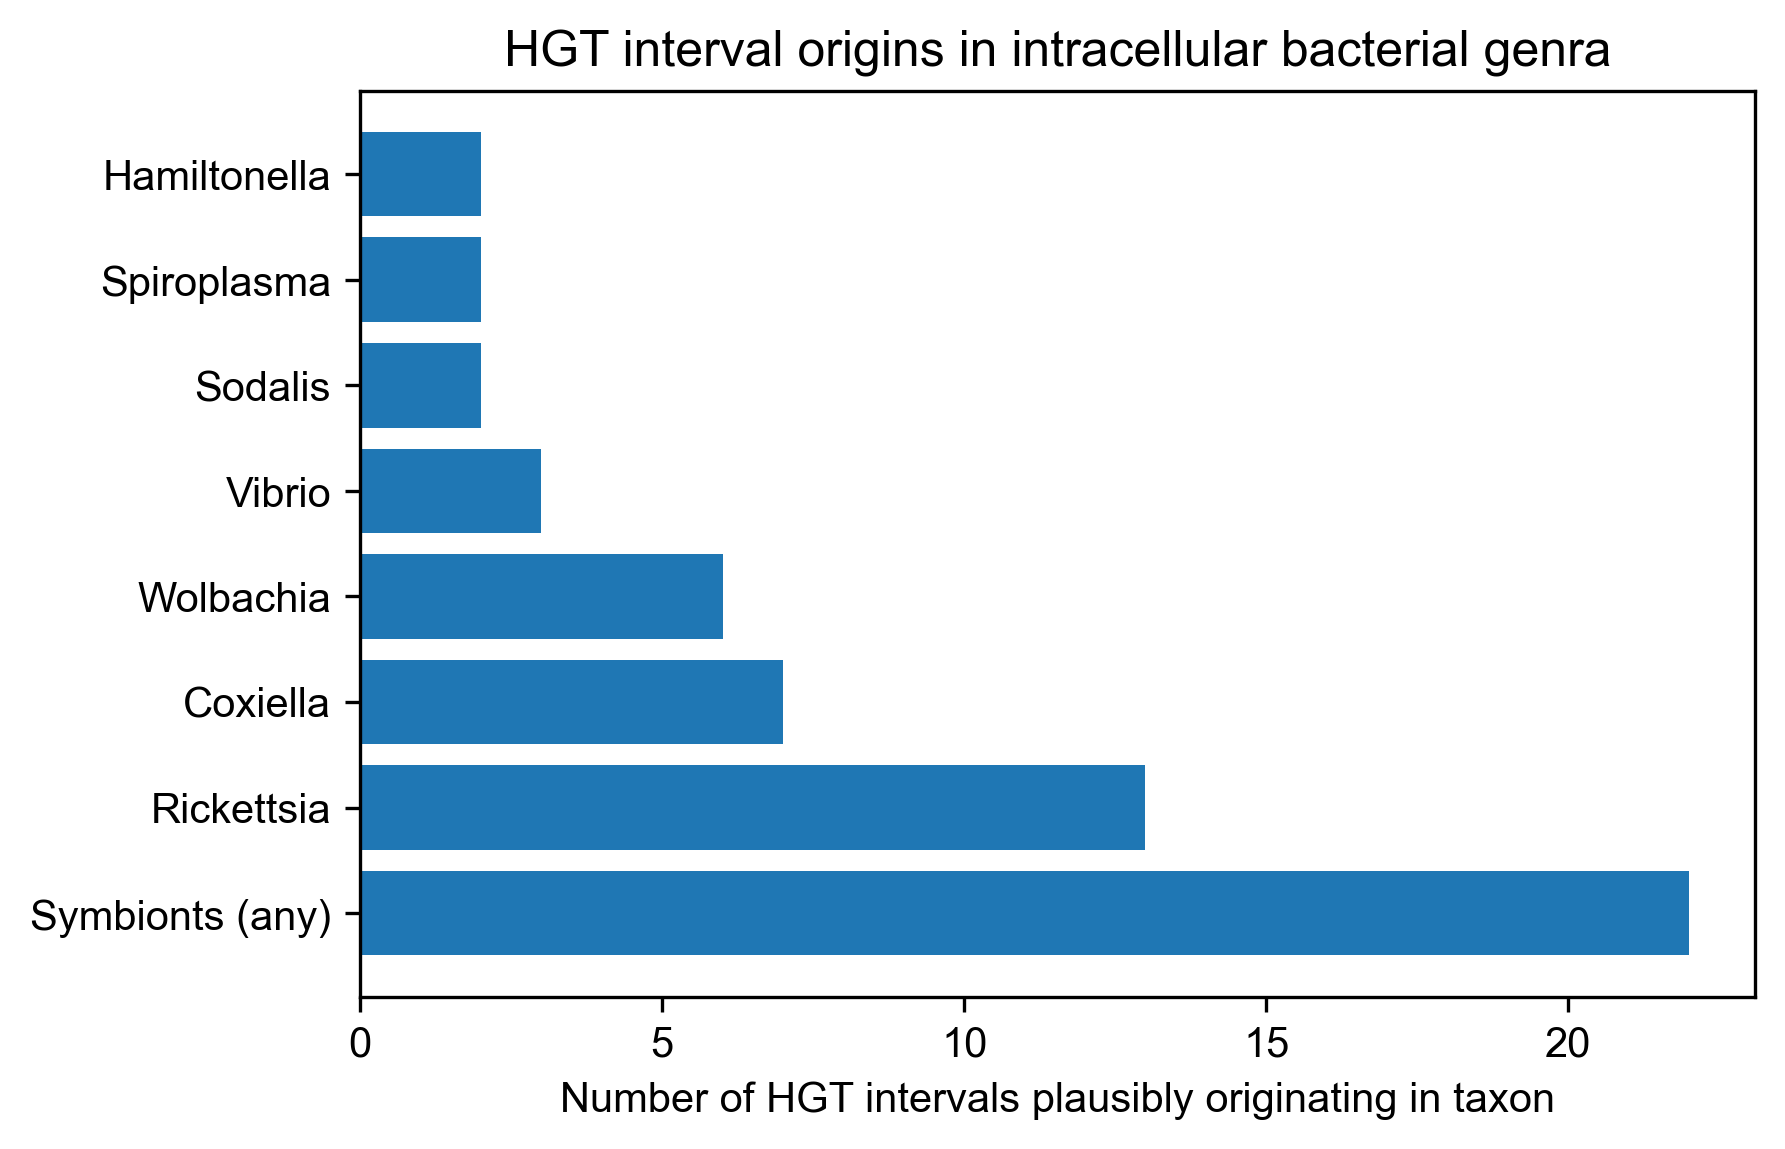

In [62]:
plt.figure(figsize=(6, 4))
dfsymb=dfsymb[dfsymb["Number of HGT Intervals"]>0].sort_values("Number of HGT Intervals",ascending=False)
plt.figure(figsize=(6, 4))
plt.barh(dfsymb.index,dfsymb["Number of HGT Intervals"])
plt.xlabel("Number of HGT intervals plausibly originating in taxon")
plt.title("HGT interval origins in intracellular bacterial genra")
plt.savefig("HGT_interval_symbiont_origins.svg",format="svg",bbox_inches="tight")
plt.show()